In [1]:
import numpy as np
import sympy as sp
from sympy.physics.quantum import TensorProduct

In [ ]:
def project_A1(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
  g = sum(dGamma**2 for dGamma in chiTab.col(0))
  dGamma = chiTab[0,0]
  return dGamma / g * (chiTab[0,0] * e +
                       chiTab[0,1] * (c6 + c6_inv) +
                       chiTab[0,2] * (c3 + c3_inv) +
                       chiTab[0,3] * c2 +
                       chiTab[0,4] * (s_v1 + s_v2 + s_v3) +
                       chiTab[0,5] * (s_d1 + s_d2 + s_d3))

def project_A2(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
  g = sum(dGamma**2 for dGamma in chiTab.col(0))
  dGamma = chiTab[1,0]
  return dGamma / g * (chiTab[1,0] * e +
                       chiTab[1,1] * (c6 + c6_inv) +
                       chiTab[1,2] * (c3 + c3_inv) +
                       chiTab[1,3] * c2 +
                       chiTab[1,4] * (s_v1 + s_v2 + s_v3) +
                       chiTab[1,5] * (s_d1 + s_d2 + s_d3))

def project_B1(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
  g = sum(dGamma**2 for dGamma in chiTab.col(0))
  dGamma = chiTab[2,0]
  return dGamma / g * (chiTab[2,0] * e +
                       chiTab[2,1] * (c6 + c6_inv) +
                       chiTab[2,2] * (c3 + c3_inv) +
                       chiTab[2,3] * c2 +
                       chiTab[2,4] * (s_v1 + s_v2 + s_v3) +
                       chiTab[2,5] * (s_d1 + s_d2 + s_d3))

def project_B2(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
  g = sum(dGamma**2 for dGamma in chiTab.col(0))
  dGamma = chiTab[3,0]
  return dGamma / g * (chiTab[3,0] * e +
                       chiTab[3,1] * (c6 + c6_inv) +
                       chiTab[3,2] * (c3 + c3_inv) +
                       chiTab[3,3] * c2 +
                       chiTab[3,4] * (s_v1 + s_v2 + s_v3) +
                       chiTab[3,5] * (s_d1 + s_d2 + s_d3))

def project_E1(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
  g = sum(dGamma**2 for dGamma in chiTab.col(0))
  dGamma = chiTab[4,0]
  return dGamma / g * (chiTab[4,0] * e +
                       chiTab[4,1] * (c6 + c6_inv) +
                       chiTab[4,2] * (c3 + c3_inv) +
                       chiTab[4,3] * c2 +
                       chiTab[4,4] * (s_v1 + s_v2 + s_v3) +
                       chiTab[4,5] * (s_d1 + s_d2 + s_d3))

def project_E2(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
  g = sum(dGamma**2 for dGamma in chiTab.col(0))
  dGamma = chiTab[5,0]
  return dGamma / g * (chiTab[5,0] * e +
                       chiTab[5,1] * (c6 + c6_inv) +
                       chiTab[5,2] * (c3 + c3_inv) +
                       chiTab[5,3] * c2 +
                       chiTab[5,4] * (s_v1 + s_v2 + s_v3) +
                       chiTab[5,5] * (s_d1 + s_d2 + s_d3))

def diagonalizeProjections(projections, names):
  sp.init_printing()
  for i, p in enumerate(projections):
    p = p.applyfunc(sp.nsimplify)
    evecs = p.eigenvects(simplify=True)

    print(names[i])
    display(evecs)

    #Only interested in eigenvalues +-1
    for v in evecs:
      if np.abs(v[0]) == 1:
        #display(v)
        for i in range(len(v[2])):
          oneIndeces = []
          minusOneIndeces = []
          for j in range(len(v[2][i])):
            if v[2][i][j] == 1:
              oneIndeces.append(j)
            elif v[2][i][j] == -1:
              minusOneIndeces.append(j)
          display(f"indecesPlus = {oneIndeces}")
          display(f"indecesMinus = {minusOneIndeces}")
      else:
        print("No matching eigenvalue")
    print("------------")
    print("\n")

projectionCallbacks = [project_A1, project_A2, project_B1, project_B2, project_E1, project_E2]
names = ["P_A1", "P_A2", "P_B1", "P_B2", "P_E1", "P_E2"]

#Character table for C_6v point group
chiTabC6v = sp.Matrix([
  [1,1,1,1,1,1], #A_1 irrep
  [1,1,1,1,-1,-1], #A_2 irrep
  [1,-1,1,-1,1,-1], #B_1 irrep
  [1,-1,1,-1,-1,1], #B_2 irrep
  [2,1,-1,-2,0,0], #E_1 irrep
  [2,-1,-1,2,0,0] #E_2 irrep
])
display(chiTabC6v)

Matrix([
[1,  1,  1,  1,  1,  1],
[1,  1,  1,  1, -1, -1],
[1, -1,  1, -1,  1, -1],
[1, -1,  1, -1, -1,  1],
[2,  1, -1, -2,  0,  0],
[2, -1, -1,  2,  0,  0]])

# Spatial part

P_A1
No matching eigenvalue


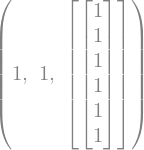

'indecesPlus = [0, 1, 2, 3, 4, 5]'

'indecesMinus = []'

------------


P_A2
No matching eigenvalue
------------


P_B1
No matching eigenvalue


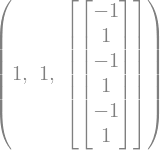

'indecesPlus = [1, 3, 5]'

'indecesMinus = [0, 2, 4]'

------------


P_B2
No matching eigenvalue
------------


P_E1
No matching eigenvalue


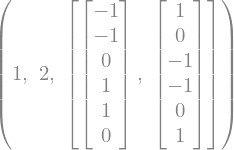

'indecesPlus = [3, 4]'

'indecesMinus = [0, 1]'

'indecesPlus = [0, 5]'

'indecesMinus = [2, 3]'

------------


P_E2
No matching eigenvalue


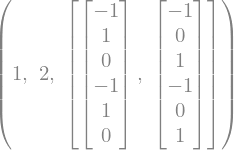

'indecesPlus = [1, 4]'

'indecesMinus = [0, 3]'

'indecesPlus = [2, 5]'

'indecesMinus = [0, 3]'

------------


P_A1
P_A2
P_B1
P_B2
P_E1
P_E2


In [3]:
#Generators
c6 = sp.Matrix([[0, 1, 0, 0, 0, 0 ], [0,0,1,0,0,0], [0,0,0,1,0,0], [0,0,0,0,1,0], [0,0,0,0,0,1], [1,0,0,0,0,0]])
s_v1 = sp.Matrix([[1, 0, 0, 0, 0, 0 ], [0,0,0,0,0,1], [0,0,0,0,1,0], [0,0,0,1,0,0], [0,0,1,0,0,0], [0,1,0,0,0,0]])
s_d1 = sp.Matrix([[0, 1, 0, 0, 0, 0 ], [1,0,0,0,0,0], [0,0,0,0,0,1], [0,0,0,0,1,0], [0,0,0,1,0,0], [0,0,1,0,0,0]])

#Derived from generators
c6_inv = c6.inv()

c3 = c6**2
c3_inv = c3.inv()

c2 = c6**3

s_v2 = c6_inv * s_v1 * c6
s_v3 = c3_inv * s_v1 * c3

s_d2 = c6_inv * s_d1 * c6
s_d3 = c3_inv * s_d1 * c3


projections = []
dim = 6
e = sp.eye(dim)
for i, proj in enumerate(projectionCallbacks):
  projections.append(proj(chiTabC6v, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3))

diagonalizeProjections(projections, names)
for i, proj in enumerate(projections):
  print(f"{names[i]}")
  #display(proj * proj - proj) # Should give 0 operator

# Orbital part

P_A1
No matching eigenvalue


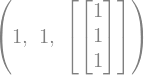

'indecesPlus = [0, 1, 2]'

'indecesMinus = []'

------------


P_A2
No matching eigenvalue
------------


P_B1
No matching eigenvalue
------------


P_B2
No matching eigenvalue
------------


P_E1
No matching eigenvalue
------------


P_E2
No matching eigenvalue


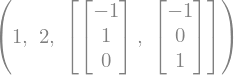

'indecesPlus = [1]'

'indecesMinus = [0]'

'indecesPlus = [2]'

'indecesMinus = [0]'

------------




In [4]:
#Generators
c6_orb = sp.Matrix([[0,0,1], [1,0,0], [0,1,0]])
s_v1_orb = sp.Matrix([[0,1,0], [1,0,0], [0,0,1]])
s_d1_orb = sp.Matrix([[1,0,0], [0,0,1], [0,1,0]])

#Derived from generators
c6_inv_orb = c6_orb.inv()

c3_orb = c6_orb**2
c3_inv_orb = c3_orb.inv()

c2_orb = c6_orb**3

s_v2_orb = c6_inv_orb * s_v1_orb * c6_orb
s_v3_orb = c3_inv_orb * s_v1_orb * c3_orb

s_d2_orb = c6_inv_orb * s_d1_orb * c6_orb
s_d3_orb = c3_inv_orb * s_d1_orb * c3_orb


projections = []
dim = 3
e = sp.eye(dim)
for i, proj in enumerate(projectionCallbacks):
  projections.append(proj(chiTabC6v, e, c6_orb, c6_inv_orb, c3_orb, c3_inv_orb, c2_orb, s_v1_orb, s_v2_orb, s_v3_orb, s_d1_orb, s_d2_orb, s_d3_orb))

diagonalizeProjections(projections, names)
# for i, proj in enumerate(projections):
#   print(f"{names[i]}")
#   display(proj * proj - proj) # Should give 0 operator
#   display(proj.trace())


# Calculate tensor products of representations $R^{orbital}(g) \otimes R^{spatial}(g)$

P_A1
No matching eigenvalue


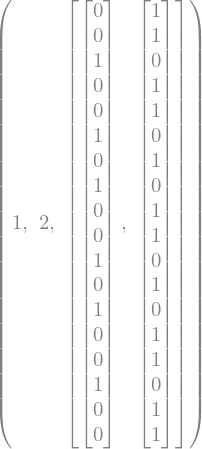

'indecesPlus = [2, 5, 7, 10, 12, 15]'

'indecesMinus = []'

'indecesPlus = [0, 1, 3, 4, 6, 8, 9, 11, 13, 14, 16, 17]'

'indecesMinus = []'

------------


P_A2
No matching eigenvalue


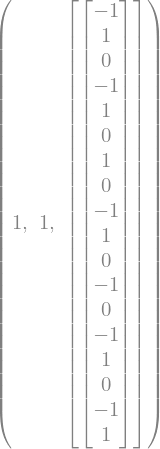

'indecesPlus = [1, 4, 6, 9, 14, 17]'

'indecesMinus = [0, 3, 8, 11, 13, 16]'

------------


P_B1
No matching eigenvalue


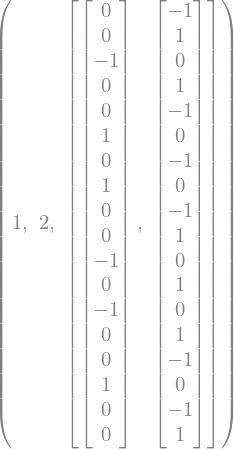

'indecesPlus = [5, 7, 15]'

'indecesMinus = [2, 10, 12]'

'indecesPlus = [1, 3, 9, 11, 13, 17]'

'indecesMinus = [0, 4, 6, 8, 14, 16]'

------------


P_B2
No matching eigenvalue


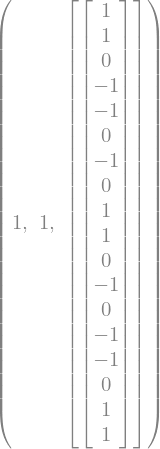

'indecesPlus = [0, 1, 8, 9, 16, 17]'

'indecesMinus = [3, 4, 6, 11, 13, 14]'

------------


P_E1
No matching eigenvalue


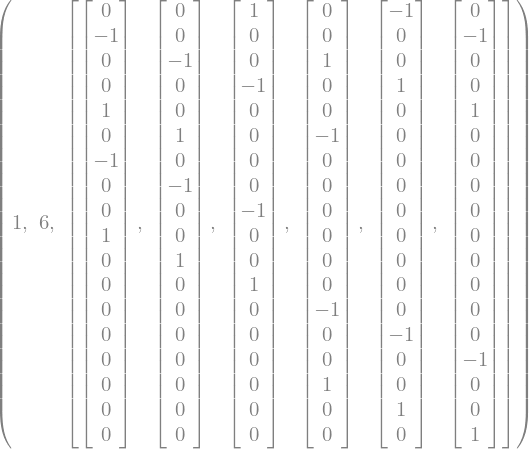

'indecesPlus = [4, 9]'

'indecesMinus = [1, 6]'

'indecesPlus = [5, 10]'

'indecesMinus = [2, 7]'

'indecesPlus = [0, 11]'

'indecesMinus = [3, 8]'

'indecesPlus = [2, 15]'

'indecesMinus = [5, 12]'

'indecesPlus = [3, 16]'

'indecesMinus = [0, 13]'

'indecesPlus = [4, 17]'

'indecesMinus = [1, 14]'

------------


P_E2
No matching eigenvalue


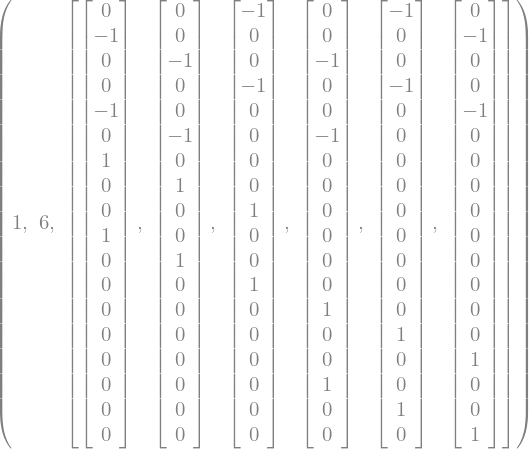

'indecesPlus = [6, 9]'

'indecesMinus = [1, 4]'

'indecesPlus = [7, 10]'

'indecesMinus = [2, 5]'

'indecesPlus = [8, 11]'

'indecesMinus = [0, 3]'

'indecesPlus = [12, 15]'

'indecesMinus = [2, 5]'

'indecesPlus = [13, 16]'

'indecesMinus = [0, 3]'

'indecesPlus = [14, 17]'

'indecesMinus = [1, 4]'

------------


P_A1


True

P_A2


True

P_B1


True

P_B2


True

P_E1


True

P_E2


True

In [5]:
c6_total = TensorProduct(c6_orb, c6)
c6_inv_total = c6_total.inv()

c3_total = TensorProduct(c3_orb, c3)
c3_inv_total = c3_total.inv()

c2_total = TensorProduct(c2_orb, c2)

s_v1_total = TensorProduct(s_v1_orb, s_v1)
s_v2_total = TensorProduct(s_v2_orb, s_v2)
s_v3_total = TensorProduct(s_v3_orb, s_v3)

s_d1_total = TensorProduct(s_d1_orb, s_d1)
s_d2_total = TensorProduct(s_d2_orb, s_d2)
s_d3_total = TensorProduct(s_d3_orb, s_d3)

projections = []
dim = 3 * 6
e = sp.eye(dim)
for i, proj in enumerate(projectionCallbacks):
  projections.append(proj(chiTabC6v, e, c6_total, c6_inv_total, c3_total, c3_inv_total, c2_total, s_v1_total, s_v2_total, s_v3_total, s_d1_total, s_d2_total, s_d3_total))

diagonalizeProjections(projections, names)
# Sanity checks
for i, proj in enumerate(projections):
  print(f"{names[i]}")

  # Multiplicity calcculated here should match the multiplicity of the eigenvalue == 1
  mGamma = 1 / 12 * (chiTabC6v[i,0] * e.trace() +
                     chiTabC6v[i,1] * (c6_total.trace() + c6_inv.trace()) +
                     chiTabC6v[i,2] * (c3.trace() + c3_inv.trace()) +
                     chiTabC6v[i,3] * c2.trace() +
                     chiTabC6v[i,4] * (s_v1.trace() + s_v2.trace() + s_v3.trace()) +
                     chiTabC6v[i,5] * (s_d1.trace() + s_d2.trace() + s_d3.trace()))
  display(mGamma)
  display(proj * proj - proj == sp.zeros(dim,dim)) # Should give 0 operator

# Spin part

In [6]:
# chiTabC6vDouble = sp.Matrix([
#   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],        # A1
#   [1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1],      # A2
#   [1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1],  # B1
#   [1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1],  # B2
#   [2, 1, 1, -1, -1, -2, 0, 0, 2, 1, 1, -1],    # E1
#   [2, -1, -1, -1, -1, 2, 0, 0, 2, -1, -1, -1], # E2
#   [2, sp.sqrt(3), -sp.sqrt(3), -1, 1, 0, 0, 0, -2, -sp.sqrt(3), sp.sqrt(3), 1],  # E_{1/2}
#   [2, -sp.sqrt(3), sp.sqrt(3), -1, 1, 0, 0, 0, -2, sp.sqrt(3), -sp.sqrt(3), 1]   # E_{3/2}
# ])

# # Double-group projections
# def project_A1_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[0,0]
#   return dGamma / g * (chiTab[0,0] * e +
#                        chiTab[0,1] * c6 +
#                        chiTab[0,2] * c6_inv +
#                        chiTab[0,3] * c3 +
#                        chiTab[0,4] * c3_inv +
#                        chiTab[0,5] * c2 +
#                        chiTab[0,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[0,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[0,8] * e -
#                        chiTab[0,9] * c6 -
#                        chiTab[0,10] * c6_inv -
#                        chiTab[0,11] * c3)

# def project_A2_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[1,0]
#   return dGamma / g * (chiTab[1,0] * e +
#                        chiTab[1,1] * c6 +
#                        chiTab[1,2] * c6_inv +
#                        chiTab[1,3] * c3 +
#                        chiTab[1,4] * c3_inv +
#                        chiTab[1,5] * c2 +
#                        chiTab[1,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[1,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[1,8] * e -
#                        chiTab[1,9] * c6 -
#                        chiTab[1,10] * c6_inv -
#                        chiTab[1,11] * c3)

# def project_B1_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[2,0]
#   return dGamma / g * (chiTab[2,0] * e +
#                        chiTab[2,1] * c6 +
#                        chiTab[2,2] * c6_inv +
#                        chiTab[2,3] * c3 +
#                        chiTab[2,4] * c3_inv +
#                        chiTab[2,5] * c2 +
#                        chiTab[2,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[2,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[2,8] * e -
#                        chiTab[2,9] * c6 -
#                        chiTab[2,10] * c6_inv -
#                        chiTab[2,11] * c3)

# def project_B2_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[3,0]
#   return dGamma / g * (chiTab[3,0] * e +
#                        chiTab[3,1] * c6 +
#                        chiTab[3,2] * c6_inv +
#                        chiTab[3,3] * c3 +
#                        chiTab[3,4] * c3_inv +
#                        chiTab[3,5] * c2 +
#                        chiTab[3,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[3,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[3,8] * e -
#                        chiTab[3,9] * c6 -
#                        chiTab[3,10] * c6_inv -
#                        chiTab[3,11] * c3)

# def project_E1_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[4,0]
#   return dGamma / g * (chiTab[4,0] * e +
#                        chiTab[4,1] * c6 +
#                        chiTab[4,2] * c6_inv +
#                        chiTab[4,3] * c3 +
#                        chiTab[4,4] * c3_inv +
#                        chiTab[4,5] * c2 +
#                        chiTab[4,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[4,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[4,8] * e -
#                        chiTab[4,9] * c6 -
#                        chiTab[4,10] * c6_inv -
#                        chiTab[4,11] * c3)

# def project_E2_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[5,0]
#   return dGamma / g * (chiTab[5,0] * e +
#                        chiTab[5,1] * c6 +
#                        chiTab[5,2] * c6_inv +
#                        chiTab[5,3] * c3 +
#                        chiTab[5,4] * c3_inv +
#                        chiTab[5,5] * c2 +
#                        chiTab[5,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[5,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[5,8] * e -
#                        chiTab[5,9] * c6 -
#                        chiTab[5,10] * c6_inv -
#                        chiTab[5,11] * c3)

# def project_E1_2_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[6,0]
#   return dGamma / g * (chiTab[6,0] * e +
#                        chiTab[6,1] * c6 +
#                        chiTab[6,2] * c6_inv +
#                        chiTab[6,3] * c3 +
#                        chiTab[6,4] * c3_inv +
#                        chiTab[6,5] * c2 +
#                        chiTab[6,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[6,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[6,8] * e -
#                        chiTab[6,9] * c6 -
#                        chiTab[6,10] * c6_inv -
#                        chiTab[6,11] * c3)

# def project_E3_2_double(chiTab, e, c6, c6_inv, c3, c3_inv, c2, s_v1, s_v2, s_v3, s_d1, s_d2, s_d3):
#   g = sum(dGamma**2 for dGamma in chiTab.col(0))
#   dGamma = chiTab[7,0]
#   return dGamma / g * (chiTab[7,0] * e +
#                        chiTab[7,1] * c6 +
#                        chiTab[7,2] * c6_inv +
#                        chiTab[7,3] * c3 +
#                        chiTab[7,4] * c3_inv +
#                        chiTab[7,5] * c2 +
#                        chiTab[7,6] * (s_v1 + s_v2 + s_v3) +
#                        chiTab[7,7] * (s_d1 + s_d2 + s_d3) -
#                        chiTab[7,8] * e -
#                        chiTab[7,9] * c6 -
#                        chiTab[7,10] * c6_inv -
#                        chiTab[7,11] * c3)

# projectionCallbacksDouble = [project_A1_double, project_A2_double, project_B1_double, project_B2_double, project_E1_double, project_E2_double, project_E1_2_double, project_E3_2_double]
# namesDouble = ["P_A1", "P_A2", "P_B1", "P_B2", "P_E1", "P_E2", "P_E1_2", "P_E3_2"]


# #Define Pauli Matrices
# s0 = sp.Matrix([[1, 0], [0, 1]])
# sx = sp.Matrix([[0, 1], [1, 0]])
# sy = sp.Matrix([[0, -sp.I], [sp.I, 0]])
# sz = sp.Matrix([[1, 0], [0, -1]])

# def Rz_spin(theta):
#   return sp.cos(theta/2)*s0 - sp.I * sp.sin(theta/2)*sz

# def Rz_real(theta):
#   return sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0], [sp.sin(theta), sp.cos(theta), 0], [0, 0, 1]])


# # Calculating vectors normal to reflection planes
# nv1 = sp.Matrix([0,1,0])
# nd1 = Rz_real(sp.pi/6) * nv1

# #Generators
# c6_spin = Rz_spin(sp.pi/3)
# #In the following there could be a minus sign, but this is only convention?
# s_v1_spin = sp.I * ( nv1[0] * sx + nv1[1] * sy + nv1[2] * sz)
# s_d1_spin = sp.I * ( nd1[0] * sx + nd1[1] * sy + nd1[2] * sz)

# #Derived from generators
# c6_inv_spin = sp.simplify(c6_spin.inv())

# c3_spin = sp.simplify(c6_spin**2)
# c3_inv_spin = sp.simplify(c3_spin.inv())

# c2_spin = sp.simplify(c6_spin**3)

# s_v2_spin = sp.simplify( c6_inv_spin * s_v1_spin * c6_spin )
# s_v3_spin = sp.simplify( c3_inv_spin * s_v1_spin * c3_spin )

# s_d2_spin = sp.simplify( c6_inv_spin * s_d1_spin * c6_spin )
# s_d3_spin = sp.simplify( c3_inv_spin * s_d1_spin * c3_spin )


# projections = []
# dim = 2
# e = sp.eye(dim)
# for i, proj in enumerate(projectionCallbacksDouble):
#   projections.append(proj(chiTabC6vDouble, e, c6_spin, c6_inv_spin, c3_spin, c3_inv_spin, c2_spin, s_v1_spin, s_v2_spin, s_v3_spin, s_d1_spin, s_d2_spin, s_d3_spin))

# #diagonalizeProjections(projections, namesDouble)
# for i, proj in enumerate(projections):
#   print(f"{namesDouble[i]}")
#   display(proj * proj - proj) # Should give 0 operator
#   display(proj.trace())
